In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing import image

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

#from PIL import Image
import numpy as np
from skimage import transform

In [2]:
def crop(image):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (210, 200))  # Resize to (220, 210)
    image = image.astype("float32")/255 # Normalize pixel values to [0, 1]
    #image = np.expand_dims(image, axis=0)
    return image

In [3]:
def process(image):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (210, 200))
    image = image.astype("float32")
    image = np.expand_dims(image, axis=0)
    return image

In [4]:
def transform(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (210, 200))
    image = image/255.0
    image = np.expand_dims(image, axis=0)
    return image

In [5]:
model = tf.keras.models.load_model('yoga-91.04.h5')

In [6]:
labels = ["Adho Mukha Svanasana" , 
          "Adho Mukha Vrksasana" , 
          "Alanasana",
         "Anjaneyasana",
         "Ardha Chandrasana",
        "Ardha Matsyendrasana",
          "Ardha Navasana",
          "Ardha Pincha Mayurasana",
          "Ashta Chandrasana",
          "Baddha Konasana",
          "Bakasana",
          "Balasana",
          "Bitilasana",
          "Camatkarasana",
          "Dhanurasana",
          "Eka Pada Rajakapotasana",
          "Garudasana",
          "Halasana",
          "Hanumanasana",
          "Malasana",
          "Marjaryasana",
          "Navasana",
          "Padmasana",
          "Parsva Virabhadrasana",
          "Parsvottanasana",
          "Paschimottanasana",
          "Phalakasana",
          "Pincha Mayurasana",
          "Salamba Bhujangasana",
          "Salamba Sarvangasana",
          "Setu Bandha Sarvangasana",
          "Sivasana",
          "Supta Kapotasana",
          "Trikonasana",
          "Upavistha Konasana",
          "Urdhva Dhanurasana",
          "Urdhva Mukha Svsnssana",
          "Ustrasana",
          "Utkatasana",
          "Uttanasana",
          "Utthita Hasta Padangusthasana",
          "Utthita Parsvakonasana",
          "Vasisthasana",
          "Virabhadrasana One",
          "Virabhadrasana Three",
          "Virabhadrasana Two",
          "Vrksasana"]

In [11]:
test_folder = 'Test Images'

In [18]:
def preprocess(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (210, 200))
    image_arr = image.astype("float32")/255.0
    image_arr = np.expand_dims(image, axis=0)
    return image_arr , image

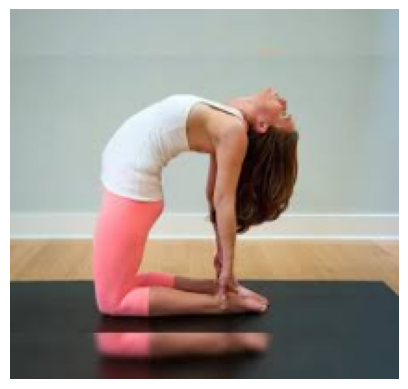

1/1 [==============================] - 0s 109ms/step
Image: img1.jpeg, Predicted Class: Ustrasana


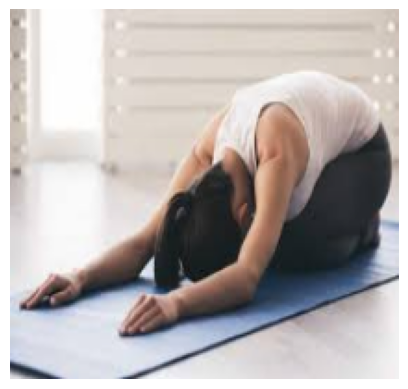

1/1 [==============================] - 0s 72ms/step
Image: img10.jpeg, Predicted Class: Balasana


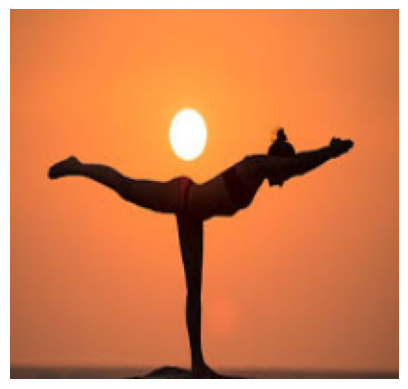

1/1 [==============================] - 0s 69ms/step
Image: img11.jpeg, Predicted Class: Virabhadrasana Three


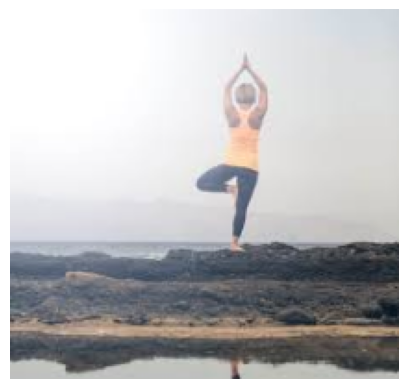

1/1 [==============================] - 0s 64ms/step
Image: img12.jpeg, Predicted Class: Utkatasana


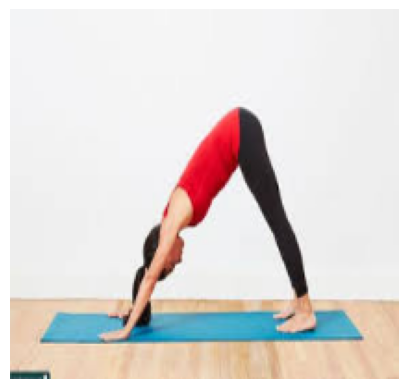

1/1 [==============================] - 0s 68ms/step
Image: img13.jpeg, Predicted Class: Adho Mukha Svanasana


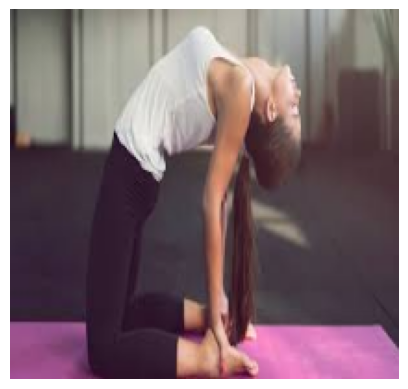

1/1 [==============================] - 0s 65ms/step
Image: img14.jpeg, Predicted Class: Ustrasana


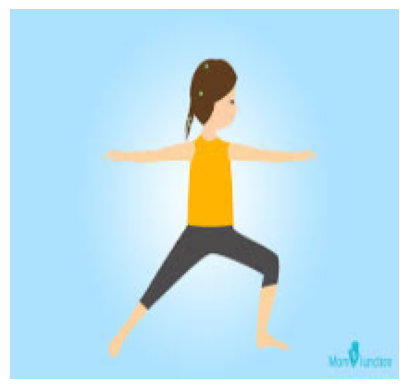

1/1 [==============================] - 0s 71ms/step
Image: img15.jpeg, Predicted Class: Trikonasana


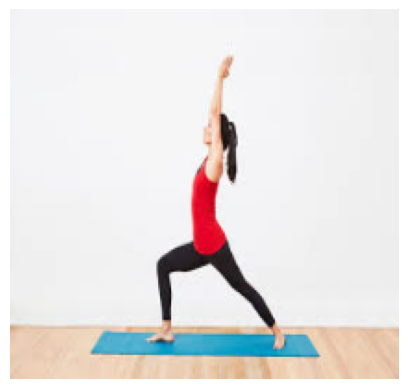

1/1 [==============================] - 0s 70ms/step
Image: img16.jpeg, Predicted Class: Ashta Chandrasana


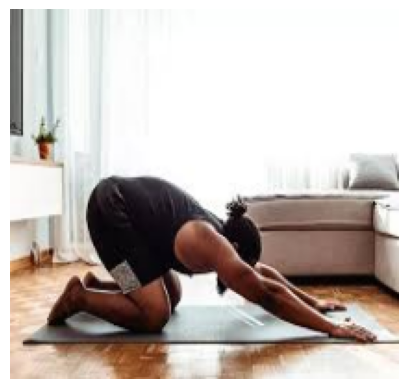

1/1 [==============================] - 0s 63ms/step
Image: img17.jpeg, Predicted Class: Balasana


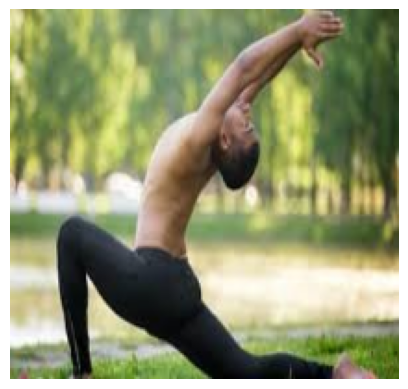

1/1 [==============================] - 0s 75ms/step
Image: img18.jpeg, Predicted Class: Anjaneyasana


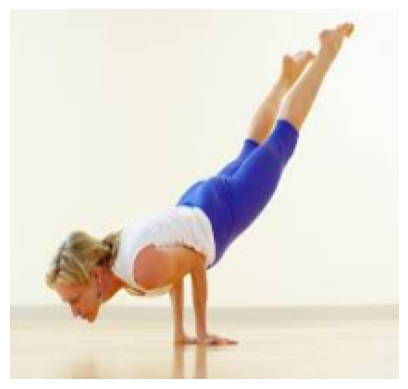

1/1 [==============================] - 0s 64ms/step
Image: img19.jpeg, Predicted Class: Phalakasana


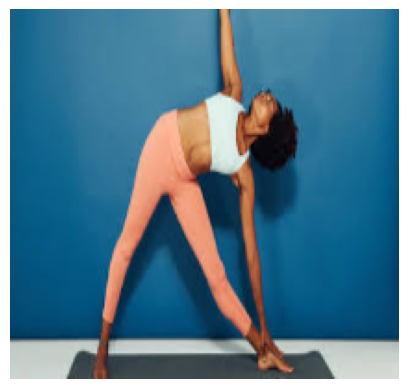

1/1 [==============================] - 0s 65ms/step
Image: img2.jpeg, Predicted Class: Trikonasana


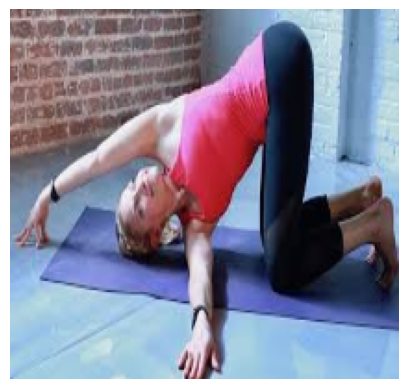

1/1 [==============================] - 0s 61ms/step
Image: img20.jpeg, Predicted Class: Utthita Parsvakonasana


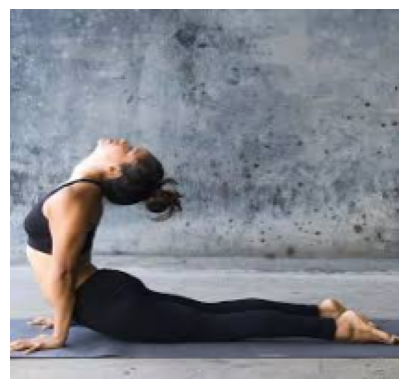

1/1 [==============================] - 0s 70ms/step
Image: img21.jpeg, Predicted Class: Urdhva Mukha Svsnssana


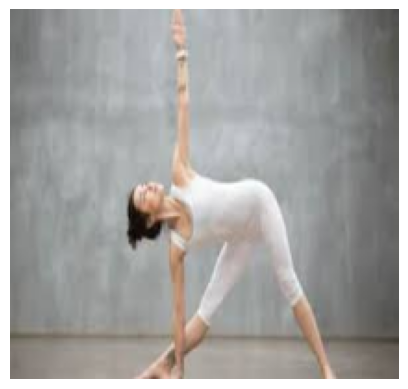

1/1 [==============================] - 0s 64ms/step
Image: img22.jpeg, Predicted Class: Trikonasana


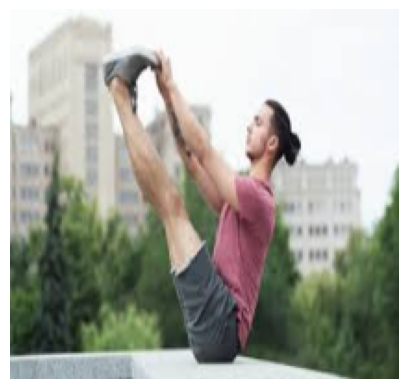

1/1 [==============================] - 0s 63ms/step
Image: img23.jpeg, Predicted Class: Navasana


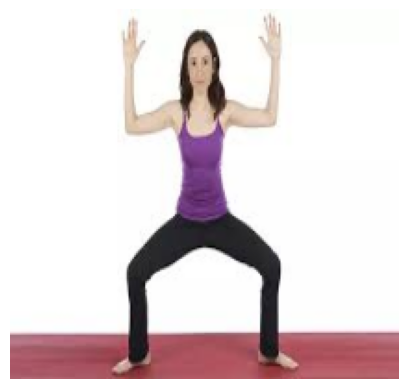

1/1 [==============================] - 0s 64ms/step
Image: img24.jpeg, Predicted Class: Virabhadrasana Two


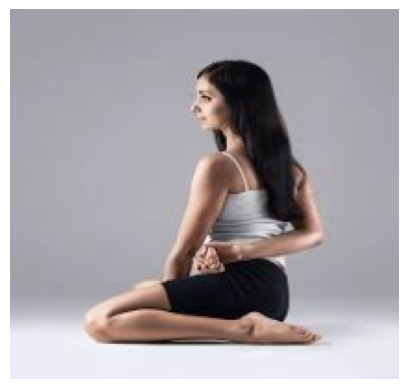

1/1 [==============================] - 0s 70ms/step
Image: img25.jpeg, Predicted Class: Padmasana


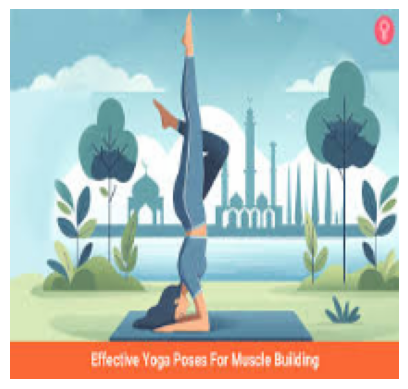

1/1 [==============================] - 0s 63ms/step
Image: img26.jpeg, Predicted Class: Virabhadrasana One


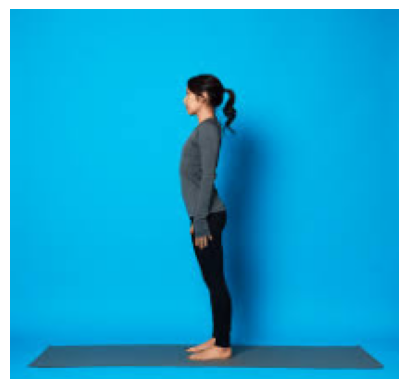

1/1 [==============================] - 0s 64ms/step
Image: img27.jpeg, Predicted Class: Utthita Hasta Padangusthasana


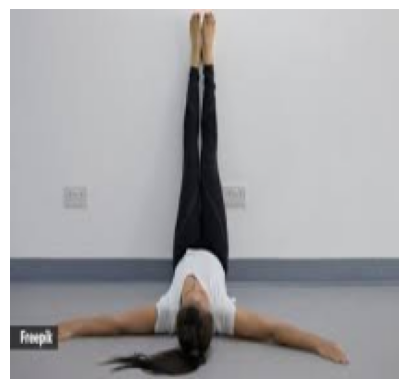

1/1 [==============================] - 0s 65ms/step
Image: img28.jpeg, Predicted Class: Salamba Sarvangasana


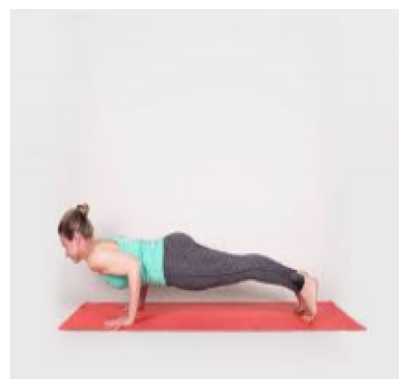

1/1 [==============================] - 0s 66ms/step
Image: img29.jpeg, Predicted Class: Sivasana


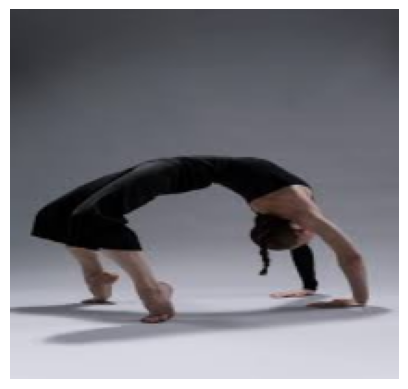

1/1 [==============================] - 0s 68ms/step
Image: img3.jpeg, Predicted Class: Urdhva Dhanurasana


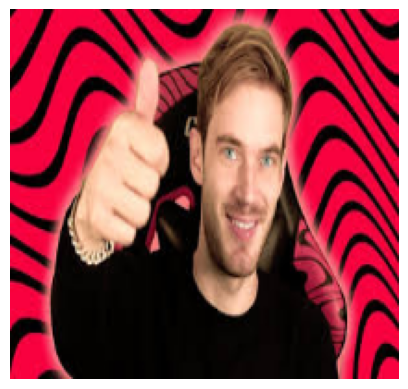

1/1 [==============================] - 0s 74ms/step
Image: img30.jpeg, Predicted Class: Paschimottanasana


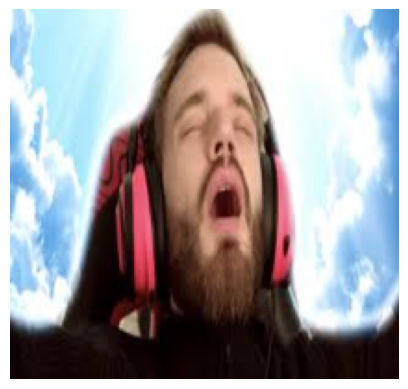

1/1 [==============================] - 0s 69ms/step
Image: img31.jpeg, Predicted Class: Malasana


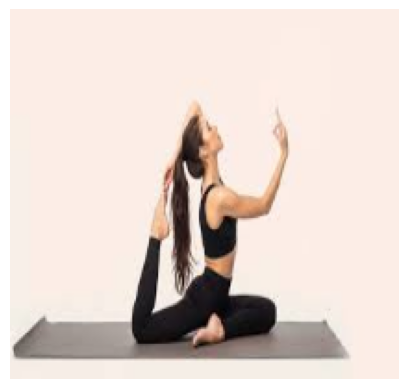

1/1 [==============================] - 0s 67ms/step
Image: img4.jpeg, Predicted Class: Eka Pada Rajakapotasana


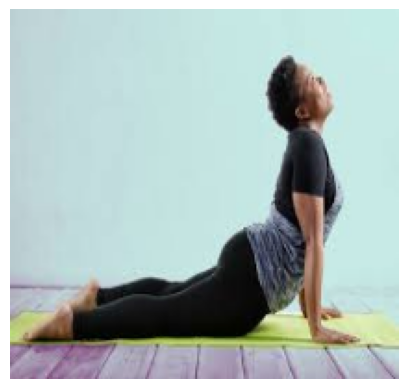

1/1 [==============================] - 0s 66ms/step
Image: img5.jpeg, Predicted Class: Urdhva Mukha Svsnssana


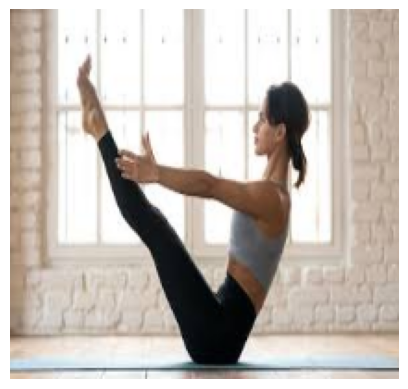

1/1 [==============================] - 0s 64ms/step
Image: img6.jpeg, Predicted Class: Navasana


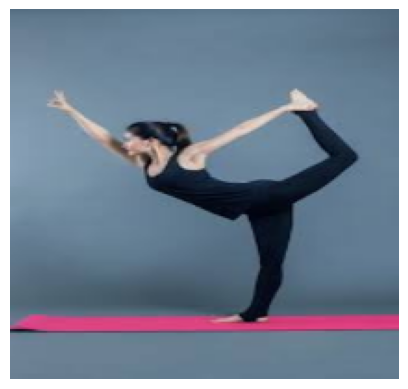

1/1 [==============================] - 0s 62ms/step
Image: img7.jpeg, Predicted Class: Utthita Hasta Padangusthasana


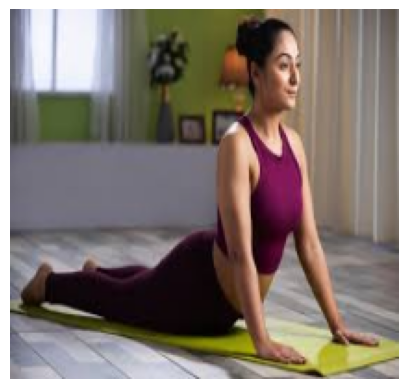

1/1 [==============================] - 0s 65ms/step
Image: img8.jpeg, Predicted Class: Salamba Bhujangasana


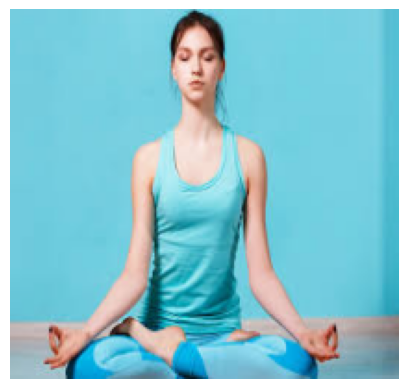

1/1 [==============================] - 0s 71ms/step
Image: img9.jpeg, Predicted Class: Padmasana


In [20]:
for filename in os.listdir(test_folder):
    if filename.endswith('.jpeg') or filename.endswith('.png'):
        image_path = os.path.join(test_folder, filename)
        
        # Preprocess
        preprocessed_image , img = preprocess(image_path)
        
        #Show Image
        plt.imshow(img)
        plt.axis('off')  # Turn off axis
        plt.show()
        
        # Make prediction
        predictions = model.predict(preprocessed_image)
        predicted_class = labels[np.argmax(predictions)]
        
        # Output results
        print(f"Image: {filename}, Predicted Class: {predicted_class}")